# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score, recall_score

# Reading The Dataset

In [2]:
data = pd.read_csv('Bank Churn Prediction.csv')

# 1st five entries of dataset

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Last Five entries of dataset

In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Description of dataset

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Checking The Correlation of data

C:\Users\HP\AppData\Local\Temp\ipykernel_15456\2613637738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


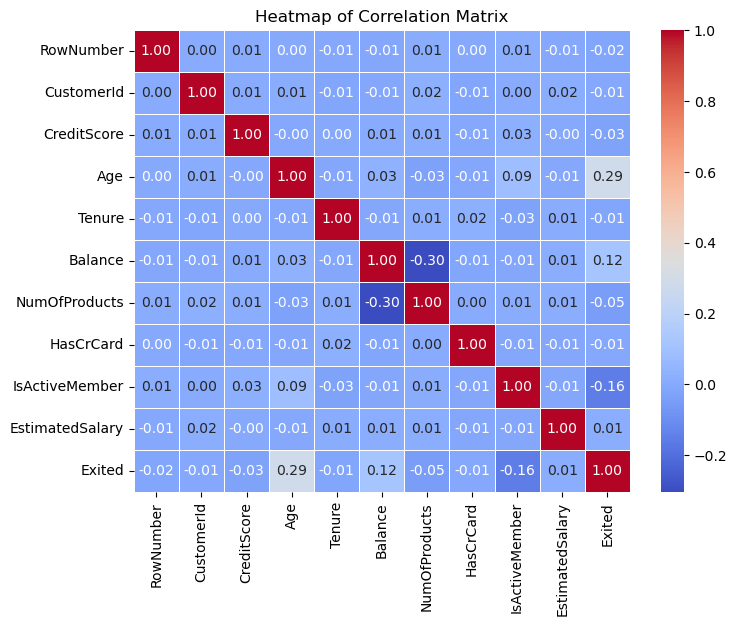

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

0    7963
1    2037
Name: Exited, dtype: int64


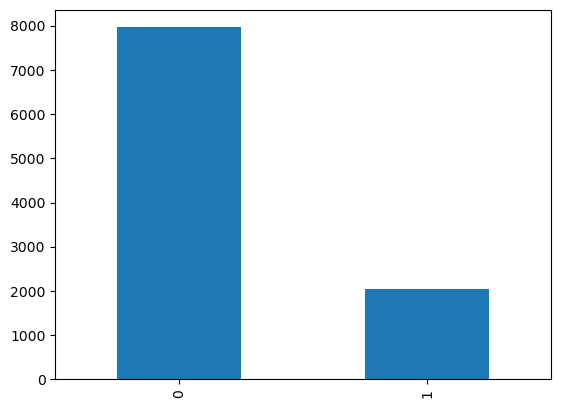

In [7]:
#Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["Exited"].map(lambda x: color_wheel.get(x + 1))
print(data.Exited.value_counts())
p=data.Exited.value_counts().plot(kind="bar")

# Droping unwanted Columns

In [8]:
data.drop('RowNumber',axis=1,inplace=True)

In [9]:
data.drop('CustomerId',axis=1,inplace=True)

In [10]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking Null Values

In [11]:
data.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Their is no null values present in the data

# Checking Datatypes

In [12]:
data.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
data.drop('Surname',axis=1,inplace=True)

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking The skewness of data

In [15]:
data.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_15456\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [16]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Converting Categorical to numerical using Label Encoder

In [17]:
LE=LabelEncoder()

In [18]:
data['Geography']=LE.fit_transform(data['Geography'])

In [19]:
data['Gender']=LE.fit_transform(data['Gender'])

In [20]:
data.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Checking Outliers

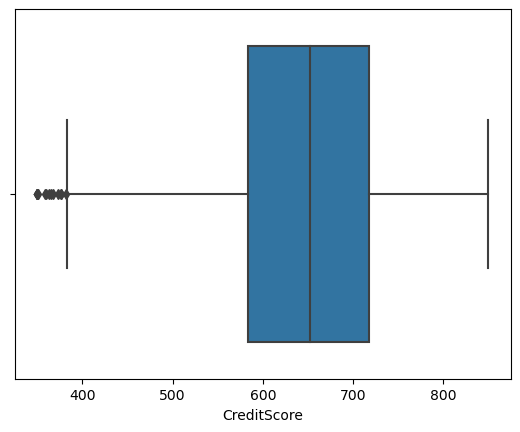

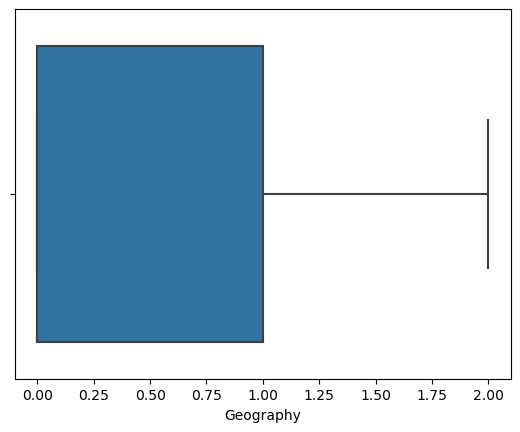

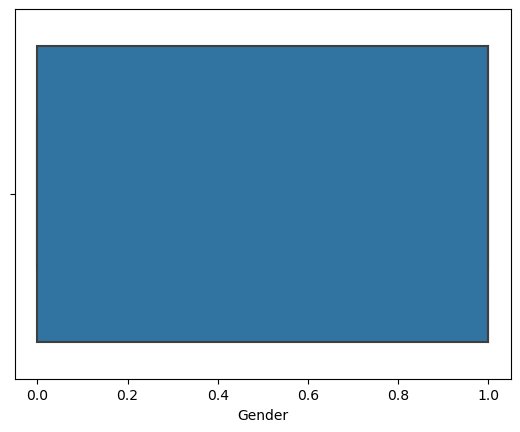

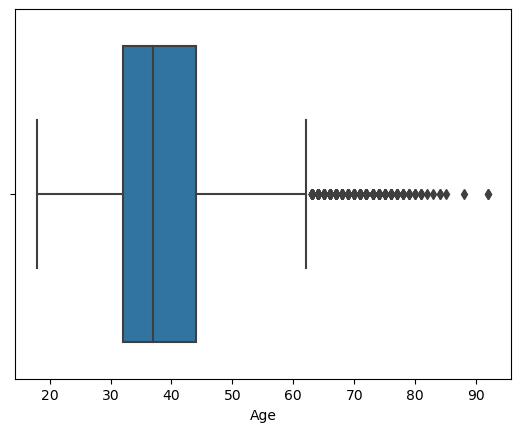

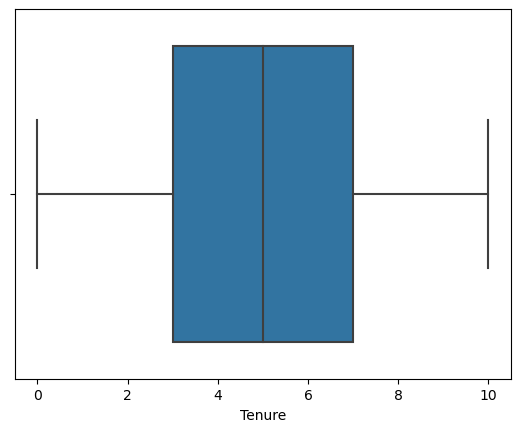

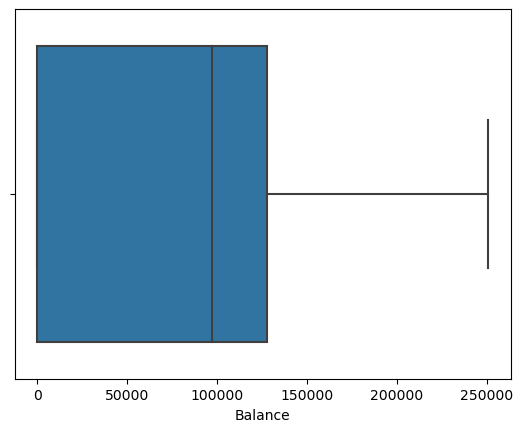

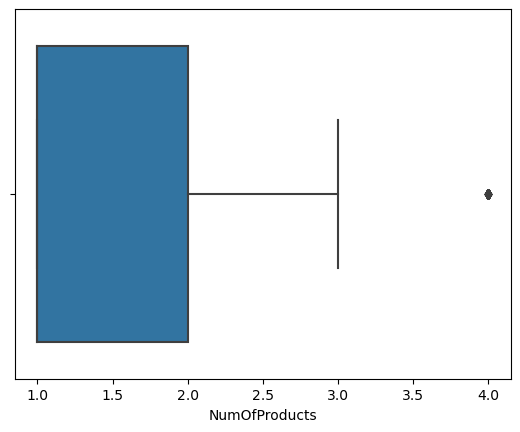

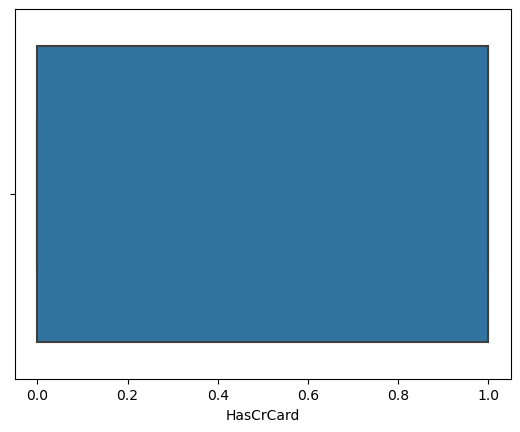

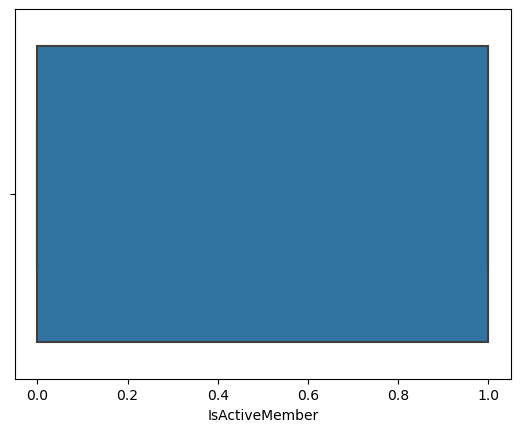

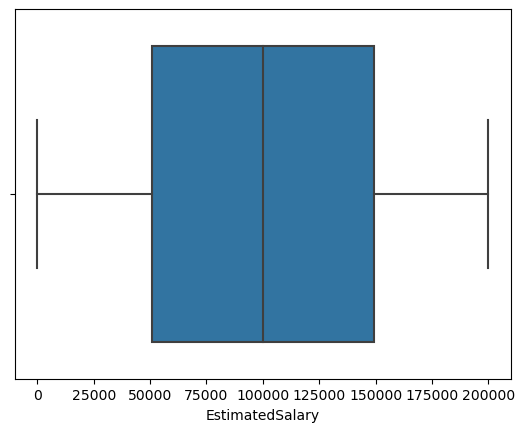

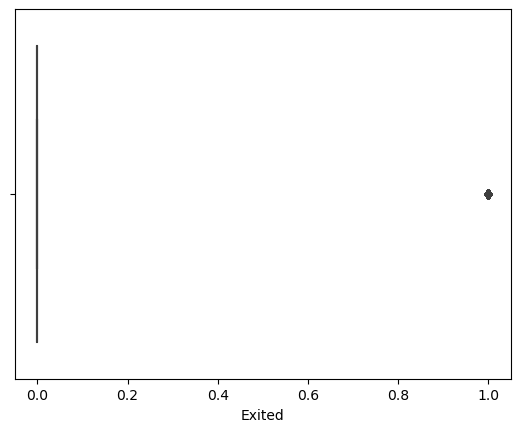

In [21]:
for i in data:
    sns.boxplot(data=data,x=i)
    plt.show()

# Treating The Outliers

In [22]:
def outlier_treatment(col):
    zscore1=(abs(zscore(data[col])))
    outlier=zscore1>+3
    median=data[col].median()
    data.loc[outlier,col]=median

In [23]:
outlier_treatment('Age')

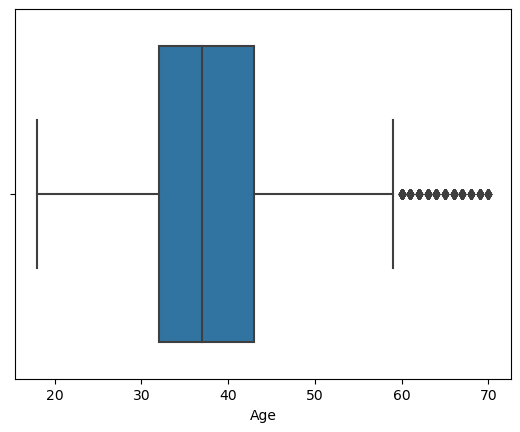

In [24]:
sns.boxplot(data=data,x='Age')
plt.show()

In [25]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0


# Checking the data is balanced or Imbalanced

<Axes: xlabel='Exited', ylabel='Gender'>

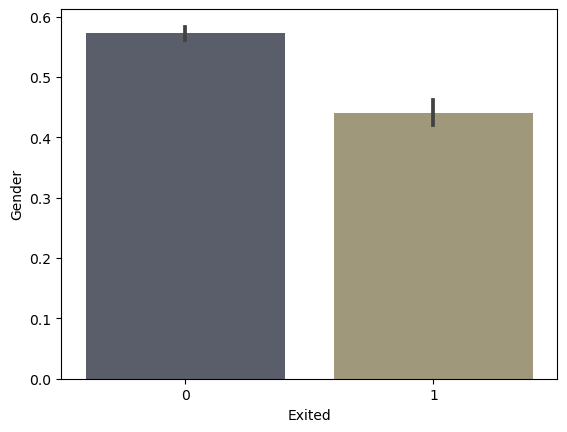

In [26]:
sns.barplot(x='Exited', y='Gender', data=data,palette = "cividis")

<Axes: xlabel='Exited', ylabel='Age'>

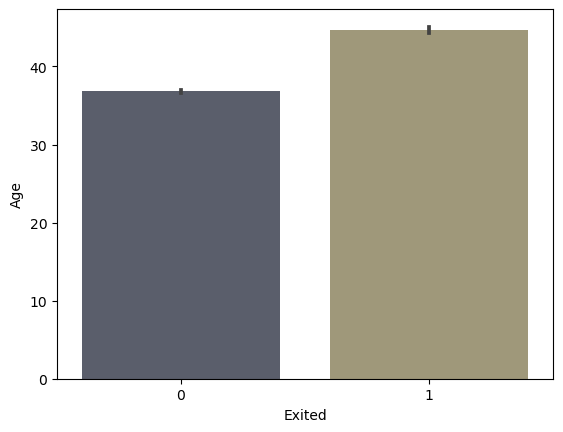

In [27]:
sns.barplot(x='Exited', y='Age', data=data,palette = "cividis")

<Axes: xlabel='Exited', ylabel='Geography'>

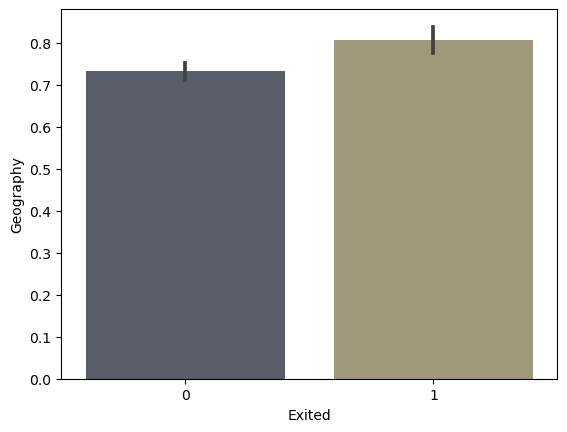

In [28]:
sns.barplot(x='Exited', y='Geography', data=data,palette = "cividis")

# Spliting the data into training and testing set

In [29]:
X = data.drop('Exited',axis=1).values

In [30]:
X

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [31]:
y = data['Exited'].values

In [32]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

## balancing the data using smote

In [34]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [35]:
X_resampled

array([[6.19000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.01348880e+05],
       [6.08000000e+02, 2.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.12542580e+05],
       [5.02000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.13931570e+05],
       ...,
       [5.94820593e+02, 0.00000000e+00, 1.63344324e-01, ...,
        8.36655676e-01, 0.00000000e+00, 6.74613113e+04],
       [8.23044151e+02, 1.18005992e-02, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.19108044e+04],
       [5.77348049e+02, 0.00000000e+00, 9.35516670e-01, ...,
        9.35516670e-01, 0.00000000e+00, 8.54827707e+04]])

# Training the model using Random Forest Classifier

In [36]:
RFC = RandomForestClassifier(n_estimators=150)

In [37]:
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

# Evaluating The model

In [38]:
model_pred = RFC.predict(x_test)

In [39]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Accuracy Score of the model

In [40]:
accuracy_score(y_test,model_pred)*100

86.8

# Classification Report 

In [41]:
print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



# Confusion Matrix

In [42]:
confusion_matrix(y_test,model_pred)

array([[1527,   68],
       [ 196,  209]], dtype=int64)

# Training using hyper paramtere Tunning

In [43]:
RFC1=RandomForestClassifier(n_estimators=205,min_samples_split=1,min_samples_leaf=1,max_depth=7,criterion='gini')

In [44]:
RFC1.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=1, n_estimators=205)

# Model Evaluation

In [45]:
predict=RFC1.predict(x_test)

In [46]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy score

In [48]:
accuracy_score(y_test,predict)*100

86.25

### F1 Score

In [49]:
f1_score(y_test,predict)

0.555735056542811

### Precision and Recall

In [50]:
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.80
Recall: 0.42


### ROC curve

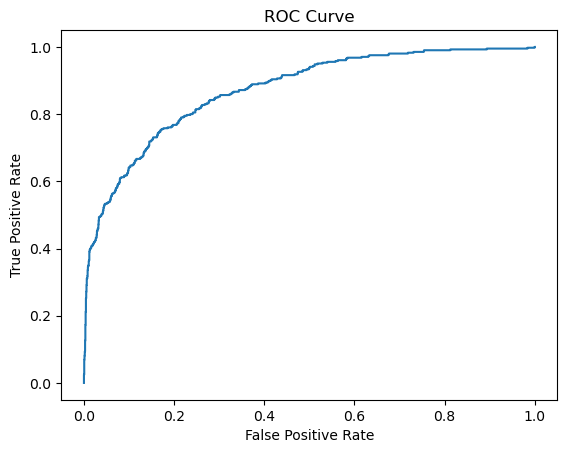

In [51]:
# Get predicted probabilities for the positive class
y_pred_proba = RFC1.predict_proba(x_test)[:, 1]
# Calculate TPR and FPR
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

# Create the ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()


In [52]:
# Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.8714


It indicates that our model’s ability to distinguish between positive and negative instances is strong.

#### Xgboost Algorithm

In [55]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 84.95 %


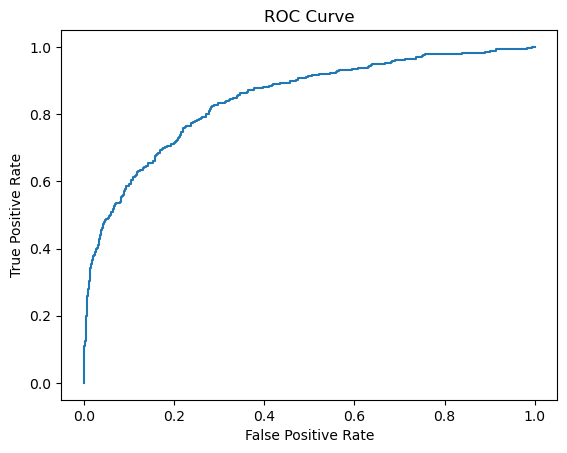

In [59]:
# Get predicted probabilities for the positive class
y_pred_proba1 = xgb_model.predict_proba(x_test)[:, 1]
# Calculate TPR and FPR
fpr1, tpr1, _ = metrics.roc_curve(y_test,y_pred_proba1)

# Create the ROC curve
plt.plot(fpr1, tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()


In [60]:
# Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
print(f"AUC: {auc:.4f}")

AUC: 0.8461


## Conclusion

The churn variable has imbalanced data. So, the solution to handle imbalanced data are :

Resample Training set
Use K-fold Cross-Validation in the Right Way
Ensemble Different Resampled Datasets
We have to change the value in the Country and Gender columns so the Machine Learning model can read and predict the dataset; after changing the value, we have to change the data types on the Country and Gender column from string to integer because XGBoost Machine Learning Model cannot read string data types even though the value in the column is number.

Lastly, XGBoost and Random Forest are the best algorithms to predict Bank Customer Churn since they have the highest accuracy (84.95% and 86.55%). Random Forest and XGBoost have perfect AUC Scores. They have 0.8461 and 0.8712 AUC Scores.